In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

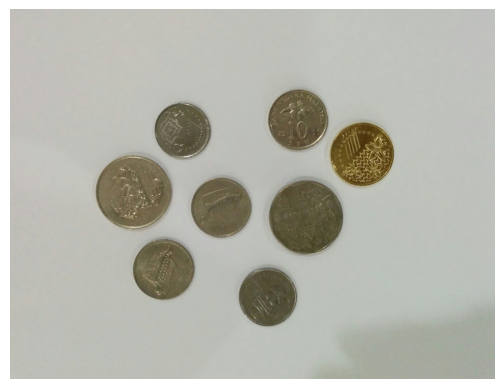

In [3]:
imBGR = cv2.imread('images/coins.jpg')
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

plt.imshow(imRGB)
plt.axis('off')  # Hide axis
plt.show()

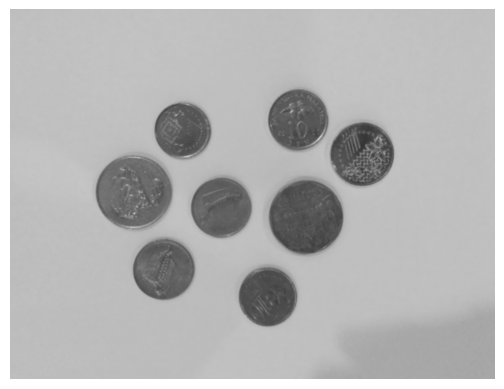

In [4]:
imGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(imGray, ksize=(5, 5), sigmaX=0, sigmaY=0)

plt.imshow(blur, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  # Hide axis
plt.show()

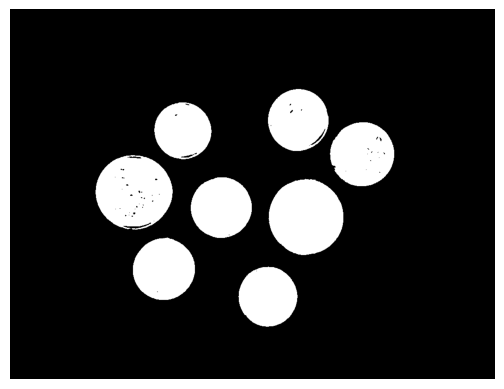

In [7]:
ret, thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  # Hide axis
plt.show()

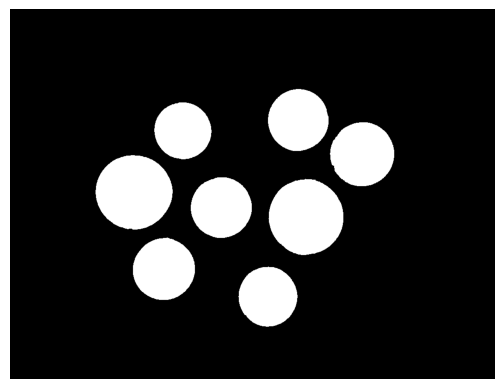

In [13]:
kernel = np.ones((5, 5), dtype=np.uint8)
closedIMG = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(closedIMG, cmap='gray', vmin=0, vmax=255)
plt.axis('off')  # Hide axis
plt.show()

Contour #0: Area: 12647.0, Perimeter: 424.1320298910141
Contour #1: Area: 13860.5, Perimeter: 440.8599535226822
Contour #2: Area: 20442.5, Perimeter: 538.1147856712341
Contour #3: Area: 13345.0, Perimeter: 432.96045875549316
Contour #4: Area: 20616.0, Perimeter: 539.1858540773392
Contour #5: Area: 14790.5, Perimeter: 460.3746705055237
Contour #6: Area: 11673.5, Perimeter: 405.06096255779266
Contour #7: Area: 13538.5, Perimeter: 436.3746713399887


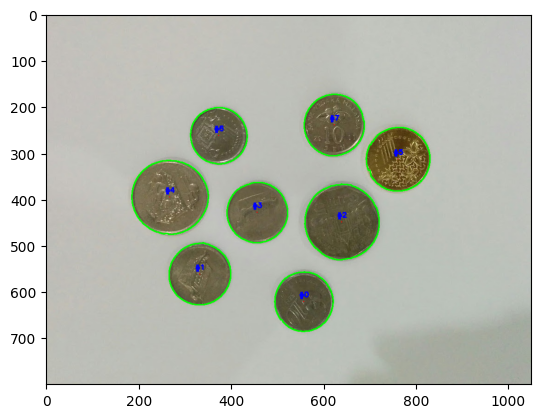

In [ ]:
contours, hierarchy = cv2.findContours(closedIMG, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
imContours = imRGB.copy()
count = 0

for c in contours:
    M = cv2.moments(c)
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    cv2.circle(imContours, (cX, cY), 1, (255,0,0), -1)
    cv2.putText(imContours, f"#{count}", (cX - 10, cY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)
    print(f"Contour #{count}: Area: {cv2.contourArea(c)}, Perimeter: {cv2.arcLength(c, True)}")
    count += 1

output = cv2.drawContours(imContours, contours, -1, (0,255,0), 2)
plt.imshow(output)